<a href="https://colab.research.google.com/github/manoj-0509/Predictive-Modelling-Using-Social-Profile-in-Online-P2P-Lending-Portal/blob/main/final_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
import pandas as pd 
import warnings
import matplotlib.pyplot as plt 
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [87]:
df=pd.read_csv("/content/drive/MyDrive/prosperLoanData.csv")
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [88]:
df.shape

(113937, 81)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [91]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [90]:
columns=df.columns
for i in columns:
  print(i,sum(pd.isnull(df[i])))

ListingKey 0
ListingNumber 0
ListingCreationDate 0
CreditGrade 84984
Term 0
LoanStatus 0
ClosedDate 58848
BorrowerAPR 25
BorrowerRate 0
LenderYield 0
EstimatedEffectiveYield 29084
EstimatedLoss 29084
EstimatedReturn 29084
ProsperRating (numeric) 29084
ProsperRating (Alpha) 29084
ProsperScore 29084
ListingCategory (numeric) 0
BorrowerState 5515
Occupation 3588
EmploymentStatus 2255
EmploymentStatusDuration 7625
IsBorrowerHomeowner 0
CurrentlyInGroup 0
GroupKey 100596
DateCreditPulled 0
CreditScoreRangeLower 591
CreditScoreRangeUpper 591
FirstRecordedCreditLine 697
CurrentCreditLines 7604
OpenCreditLines 7604
TotalCreditLinespast7years 697
OpenRevolvingAccounts 0
OpenRevolvingMonthlyPayment 0
InquiriesLast6Months 697
TotalInquiries 1159
CurrentDelinquencies 697
AmountDelinquent 7622
DelinquenciesLast7Years 990
PublicRecordsLast10Years 697
PublicRecordsLast12Months 7604
RevolvingCreditBalance 7604
BankcardUtilization 7604
AvailableBankcardCredit 7544
TotalTrades 7544
TradesNeverDelinquent

Here total dataset size is **113937**

We can remove the columns with null values more than 80,000

CreditGrade 84984

GroupKey 100596

TotalProsperLoans 91852

TotalProsperPaymentsBilled 91852

OnTimeProsperPayments 91852

ProsperPaymentsLessThanOneMonthLate 91852

ProsperPaymentsOneMonthPlusLate 91852

ProsperPrincipalBorrowed 91852

ProsperPrincipalOutstanding 91852

ScorexChangeAtTimeOfListing 95009

LoanFirstDefaultedCycleNumber 96985

In [92]:
columns=["CreditGrade","GroupKey","TotalProsperLoans","TotalProsperPaymentsBilled","OnTimeProsperPayments",
        "ProsperPaymentsLessThanOneMonthLate","ProsperPaymentsOneMonthPlusLate","ProsperPrincipalBorrowed",
        "ProsperPrincipalOutstanding","ScorexChangeAtTimeOfListing","LoanFirstDefaultedCycleNumber"]

In [93]:
for i in columns :
  df=df.drop([i], axis='columns')
#df.head()

In [94]:
df_cat_col = df.select_dtypes(include=('int')).columns
for c in df_cat_col:
    df[c].fillna(df[c].mean(), inplace=True)

df.select_dtypes(include=('int')).isna().sum()

ListingNumber                 0
Term                          0
ListingCategory (numeric)     0
OpenRevolvingAccounts         0
LoanCurrentDaysDelinquent     0
LoanMonthsSinceOrigination    0
LoanNumber                    0
LoanOriginalAmount            0
Recommendations               0
InvestmentFromFriendsCount    0
Investors                     0
dtype: int64

In [95]:
df_cat_col = df.select_dtypes(include=('float')).columns
for c in df_cat_col:
    df[c].fillna(df[c].mean(), inplace=True)

df.select_dtypes(include=('float')).isna().sum()

BorrowerAPR                           0
BorrowerRate                          0
LenderYield                           0
EstimatedEffectiveYield               0
EstimatedLoss                         0
EstimatedReturn                       0
ProsperRating (numeric)               0
ProsperScore                          0
EmploymentStatusDuration              0
CreditScoreRangeLower                 0
CreditScoreRangeUpper                 0
CurrentCreditLines                    0
OpenCreditLines                       0
TotalCreditLinespast7years            0
OpenRevolvingMonthlyPayment           0
InquiriesLast6Months                  0
TotalInquiries                        0
CurrentDelinquencies                  0
AmountDelinquent                      0
DelinquenciesLast7Years               0
PublicRecordsLast10Years              0
PublicRecordsLast12Months             0
RevolvingCreditBalance                0
BankcardUtilization                   0
AvailableBankcardCredit               0


In [97]:
df_cat_col = df.select_dtypes(include=('object')).columns
for c in df_cat_col:
    df[c].fillna(df[c].mode().values[0], inplace=True)

df.select_dtypes(include=('object')).isna().sum()

ListingKey                 0
ListingCreationDate        0
LoanStatus                 0
ClosedDate                 0
ProsperRating (Alpha)      0
BorrowerState              0
Occupation                 0
EmploymentStatus           0
DateCreditPulled           0
FirstRecordedCreditLine    0
IncomeRange                0
LoanKey                    0
LoanOriginationDate        0
LoanOriginationQuarter     0
MemberKey                  0
dtype: int64

In [96]:
columns=df.columns
for i in columns:
  print(i,sum(pd.isnull(df[i])))

ListingKey 0
ListingNumber 0
ListingCreationDate 0
Term 0
LoanStatus 0
ClosedDate 58848
BorrowerAPR 0
BorrowerRate 0
LenderYield 0
EstimatedEffectiveYield 0
EstimatedLoss 0
EstimatedReturn 0
ProsperRating (numeric) 0
ProsperRating (Alpha) 29084
ProsperScore 0
ListingCategory (numeric) 0
BorrowerState 5515
Occupation 3588
EmploymentStatus 2255
EmploymentStatusDuration 0
IsBorrowerHomeowner 0
CurrentlyInGroup 0
DateCreditPulled 0
CreditScoreRangeLower 0
CreditScoreRangeUpper 0
FirstRecordedCreditLine 697
CurrentCreditLines 0
OpenCreditLines 0
TotalCreditLinespast7years 0
OpenRevolvingAccounts 0
OpenRevolvingMonthlyPayment 0
InquiriesLast6Months 0
TotalInquiries 0
CurrentDelinquencies 0
AmountDelinquent 0
DelinquenciesLast7Years 0
PublicRecordsLast10Years 0
PublicRecordsLast12Months 0
RevolvingCreditBalance 0
BankcardUtilization 0
AvailableBankcardCredit 0
TotalTrades 0
TradesNeverDelinquent (percentage) 0
TradesOpenedLast6Months 0
DebtToIncomeRatio 0
IncomeRange 0
IncomeVerifiable 0
Stat

In [98]:
le=LabelEncoder()
c=df.select_dtypes(include=('object')).columns
for i in c :
  df[i]=le.fit_transform(df[i])

<ipython-input-99-14d93ddcc55f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], hist=True, kde=False,bins=9, color = 'blue',hist_kws={'edgecolor':'black'})


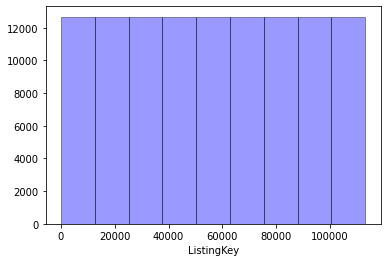

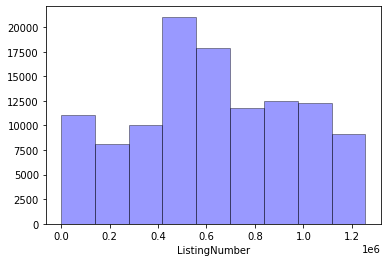

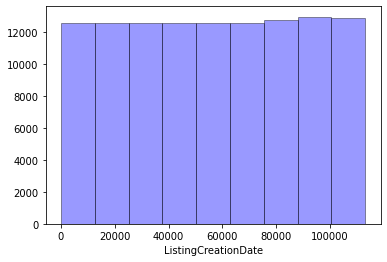

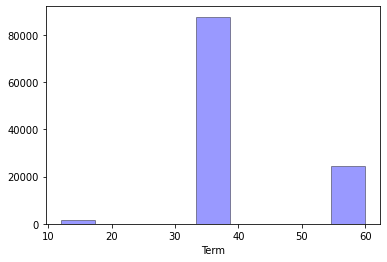

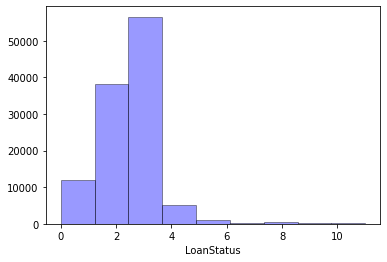

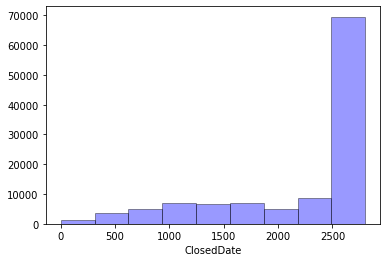

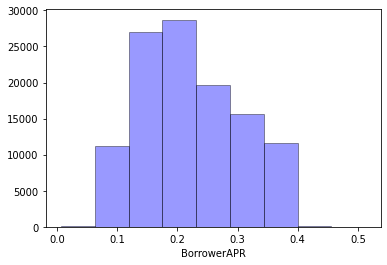

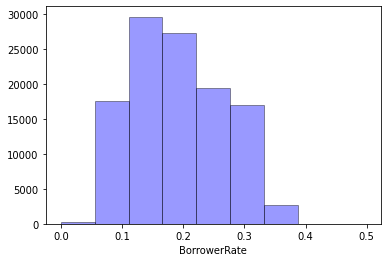

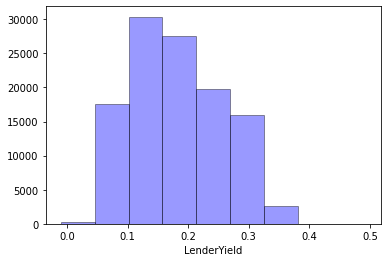

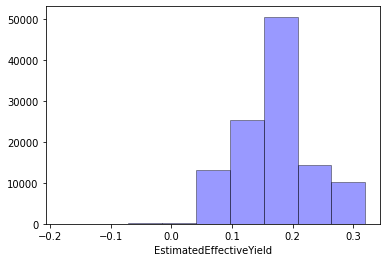

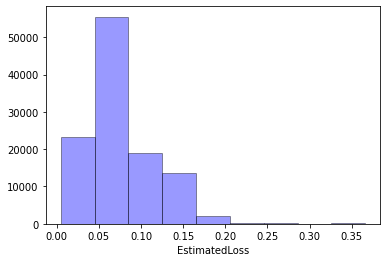

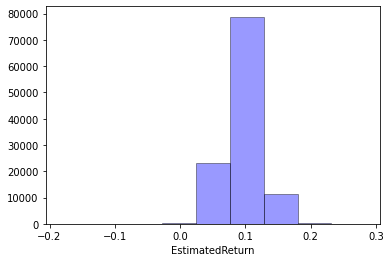

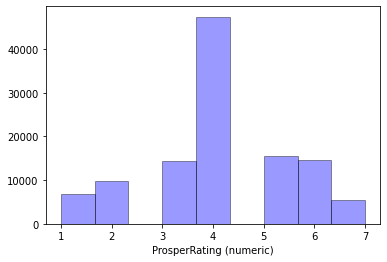

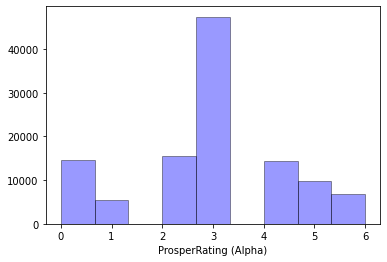

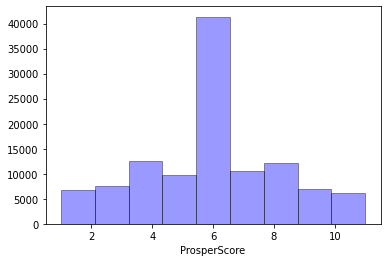

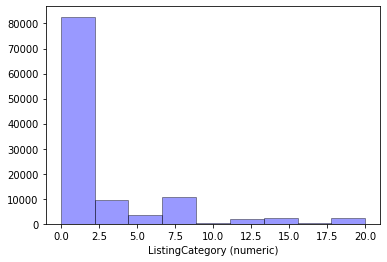

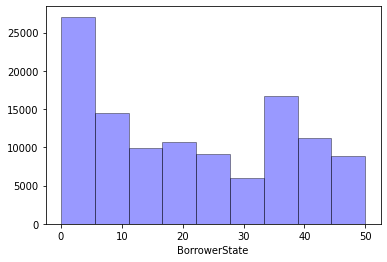

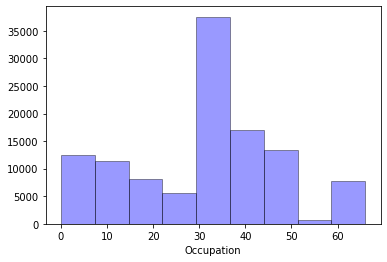

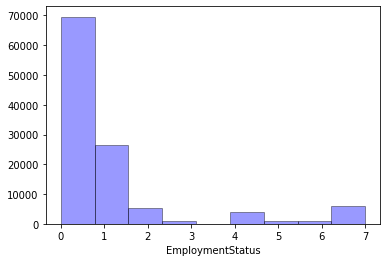

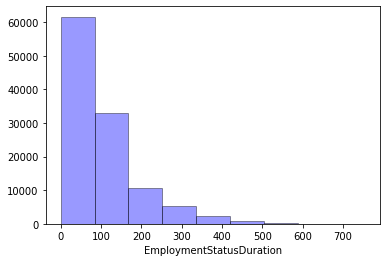

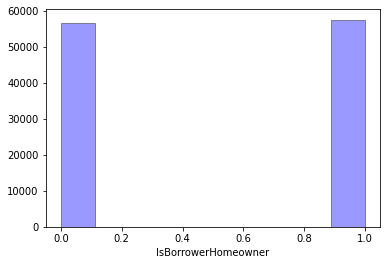

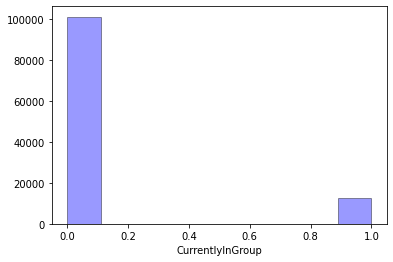

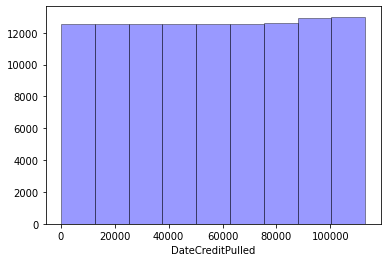

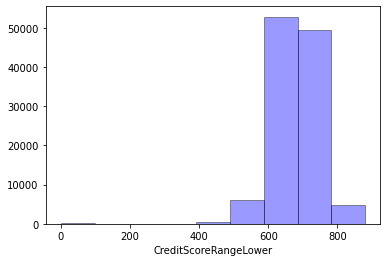

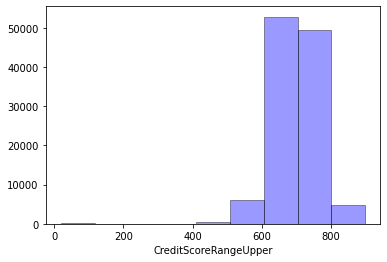

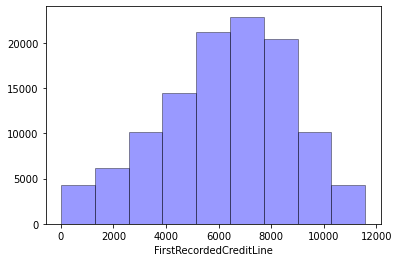

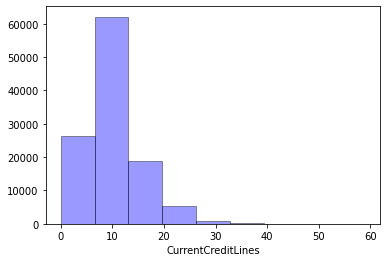

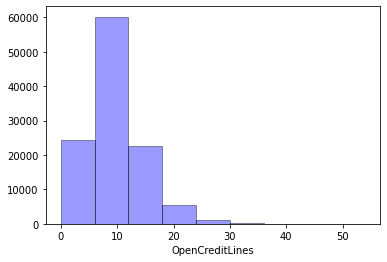

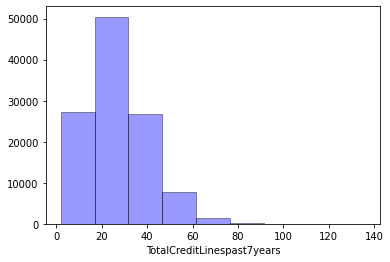

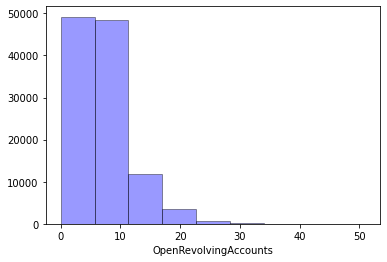

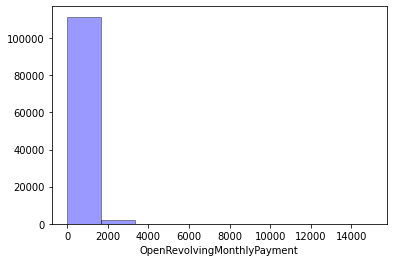

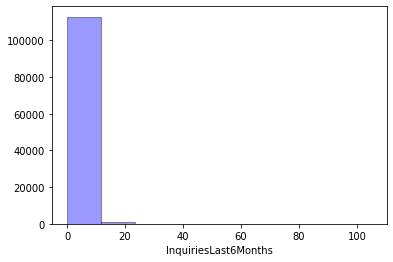

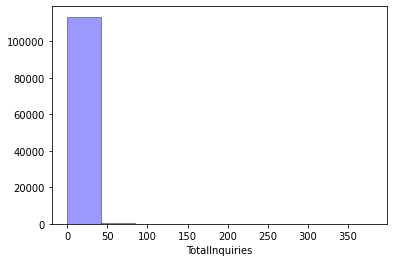

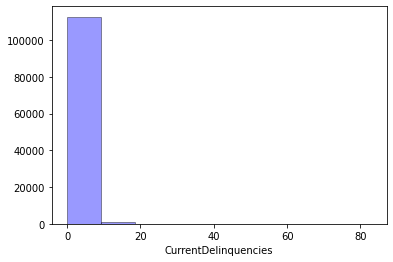

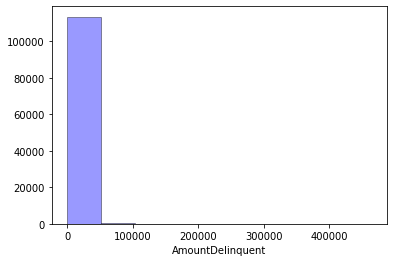

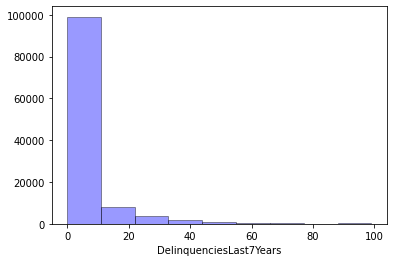

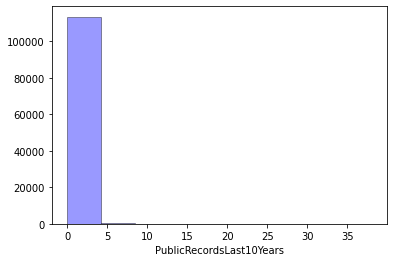

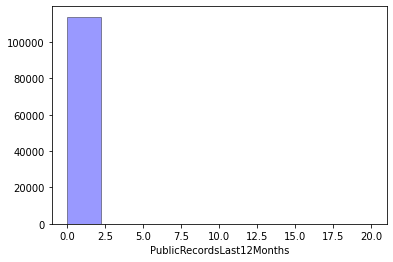

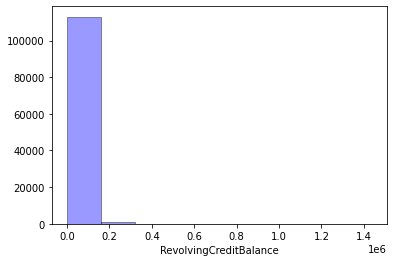

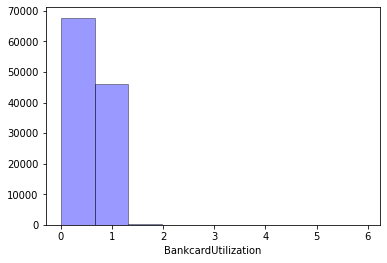

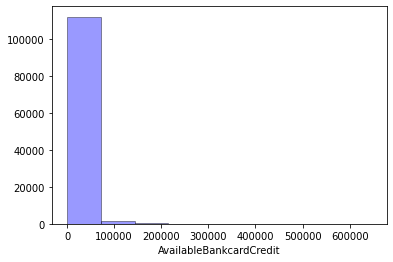

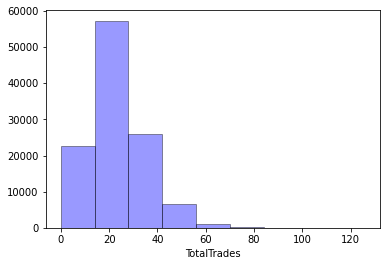

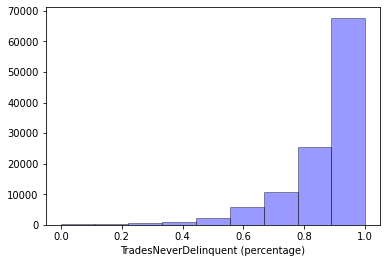

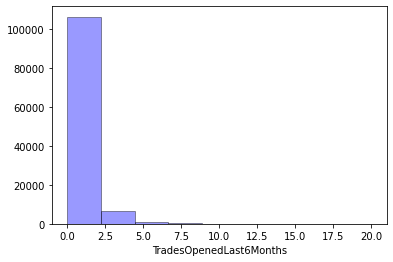

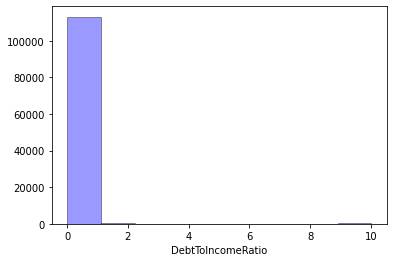

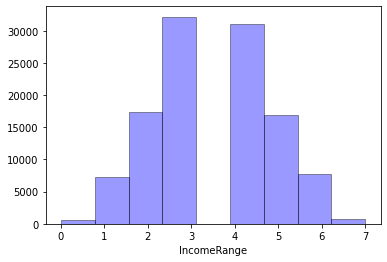

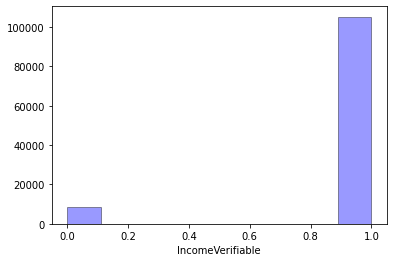

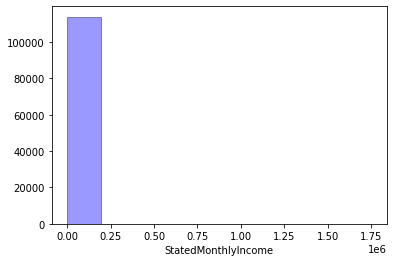

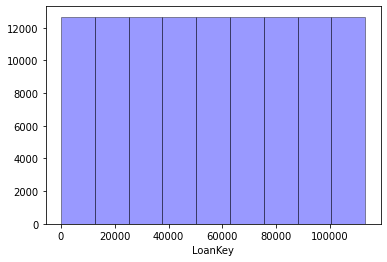

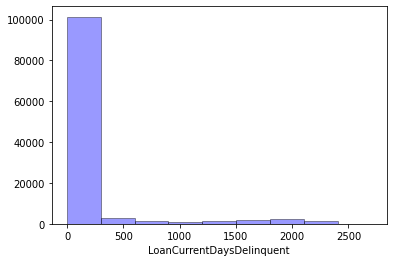

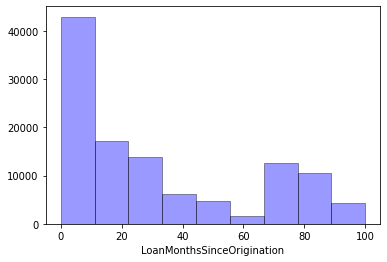

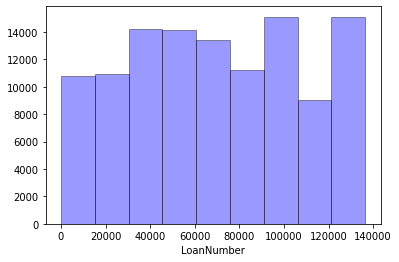

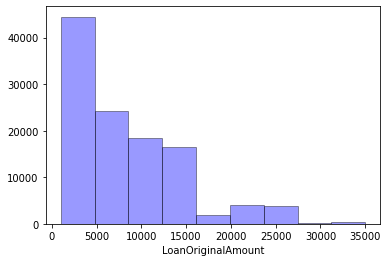

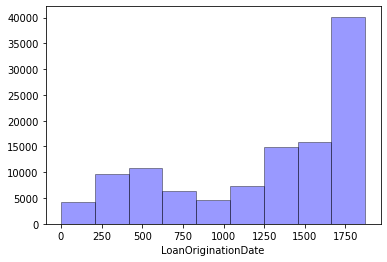

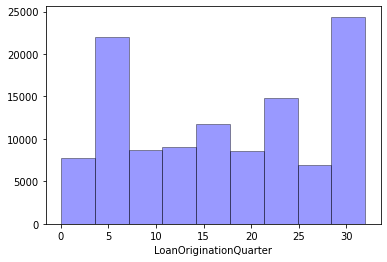

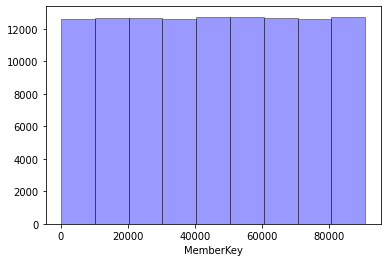

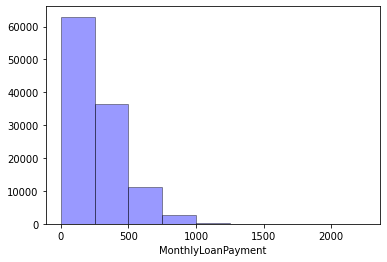

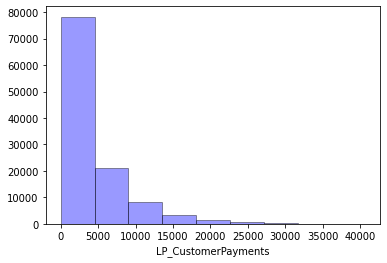

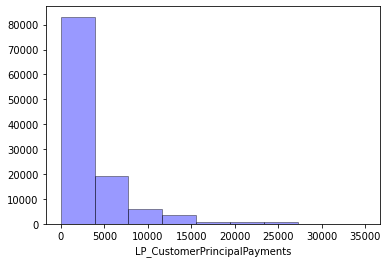

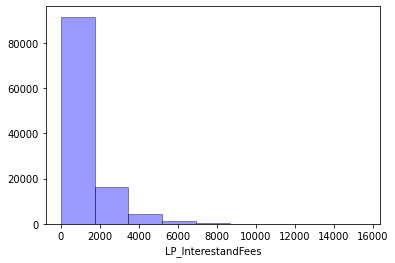

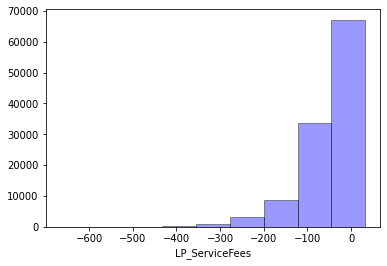

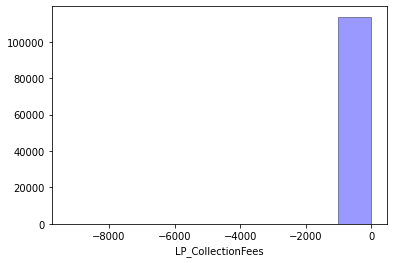

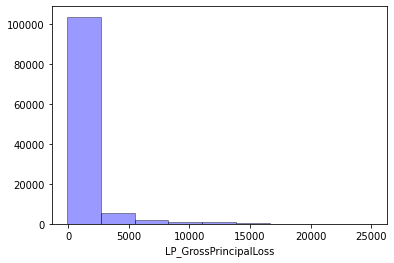

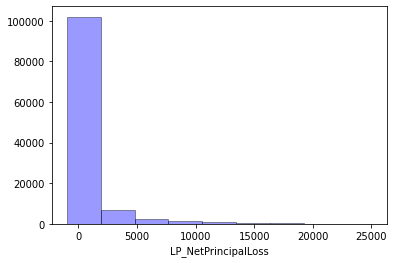

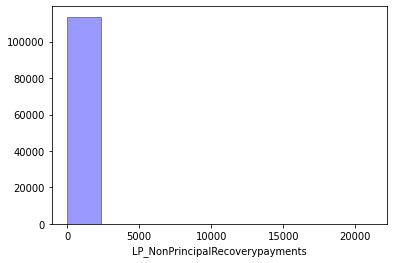

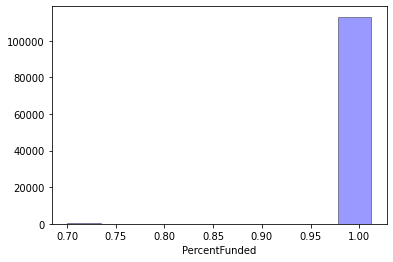

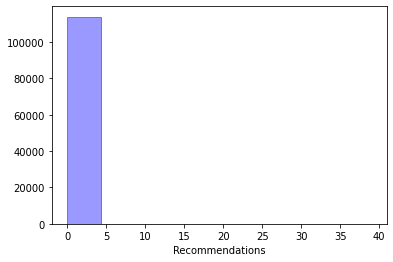

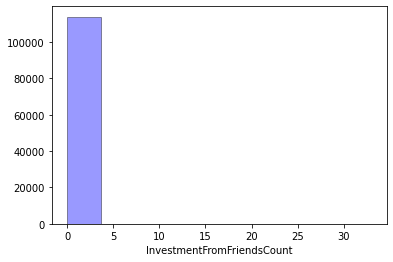

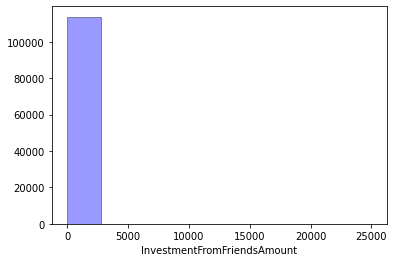

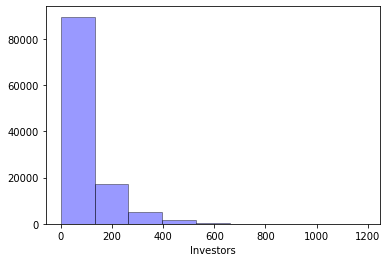

In [99]:
col=df.columns
for i in col :
  sns.distplot(df[i], hist=True, kde=False,bins=9, color = 'blue',hist_kws={'edgecolor':'black'})
  plt.show()

<ipython-input-100-6a769597b756>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


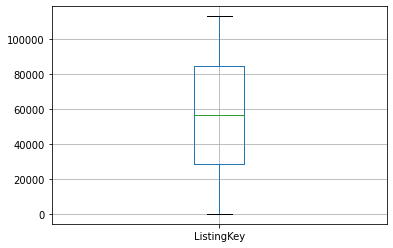

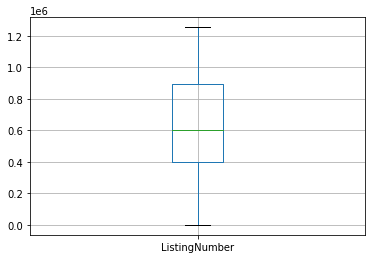

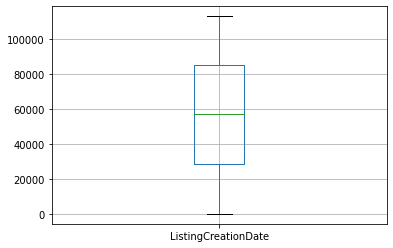

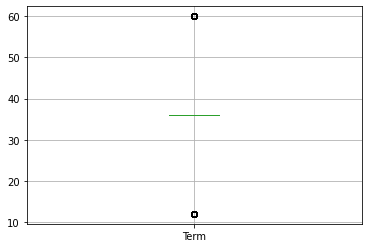

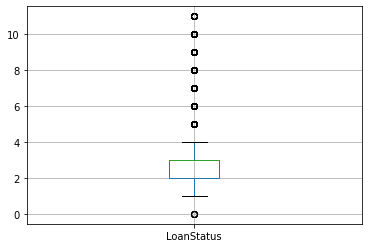

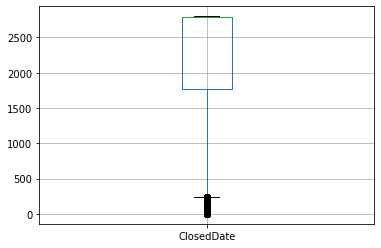

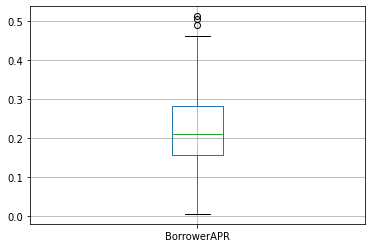

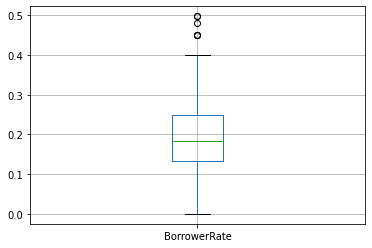

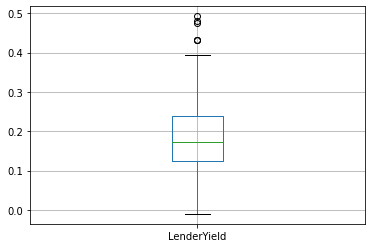

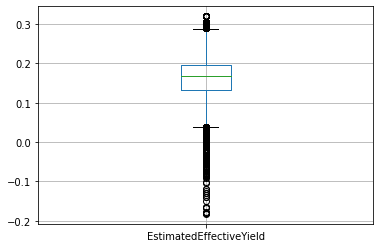

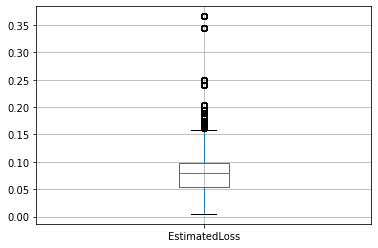

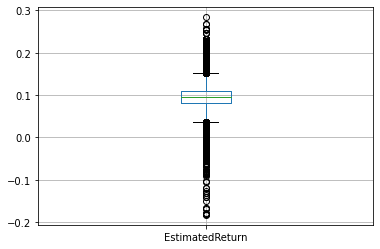

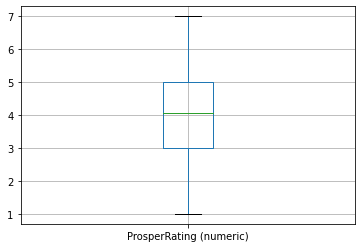

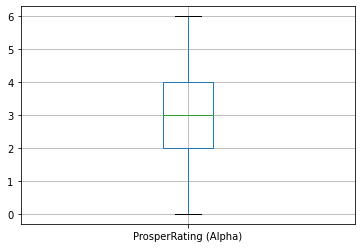

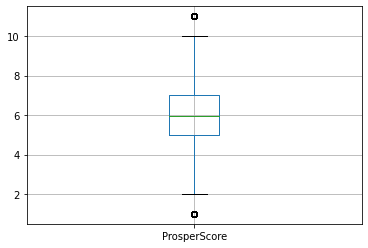

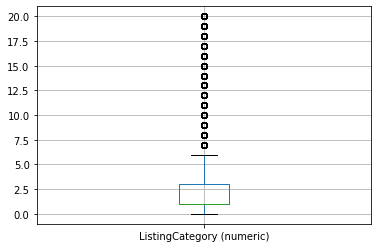

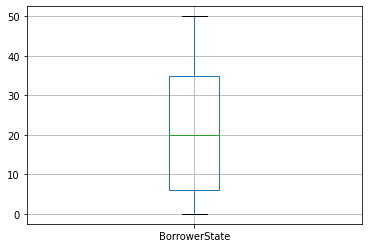

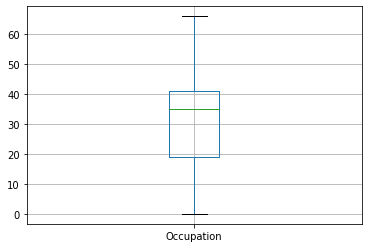

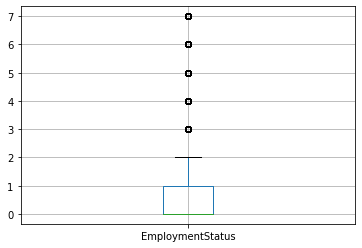

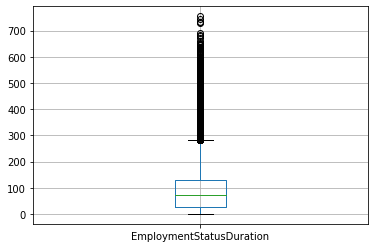

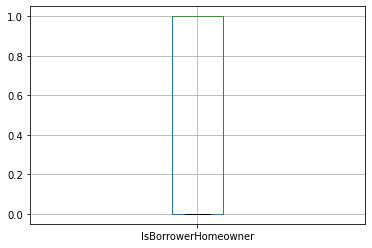

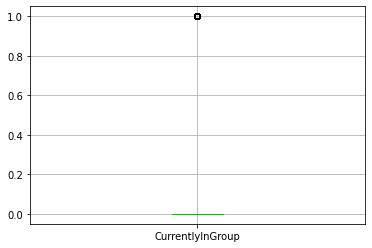

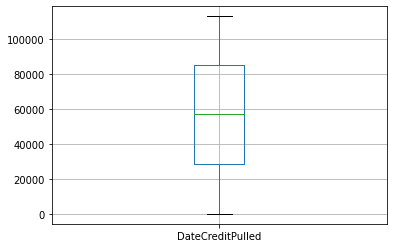

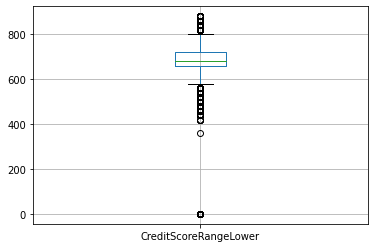

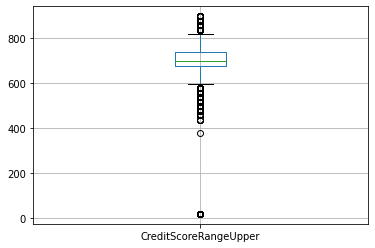

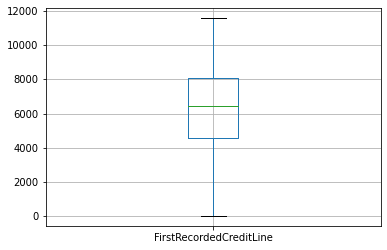

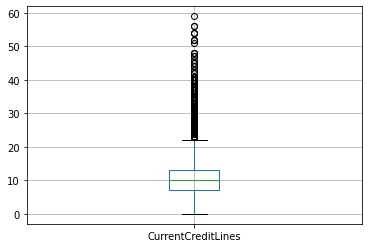

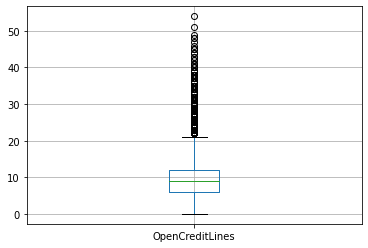

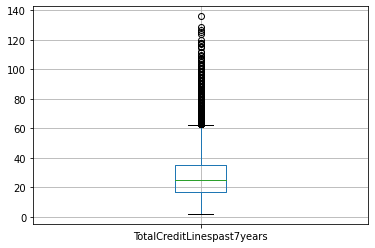

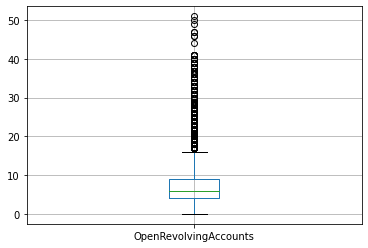

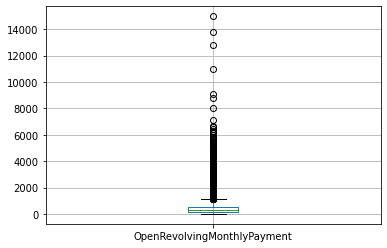

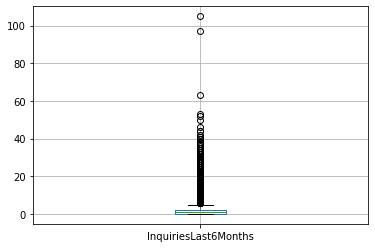

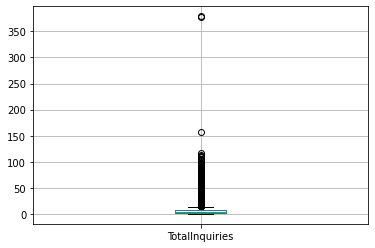

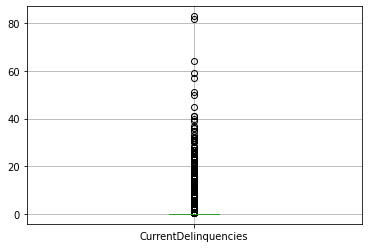

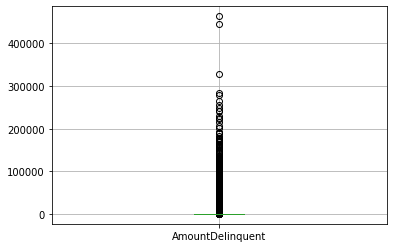

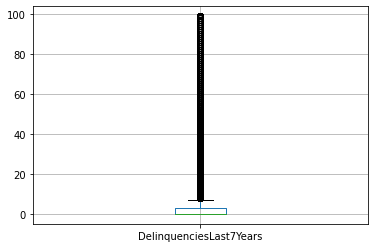

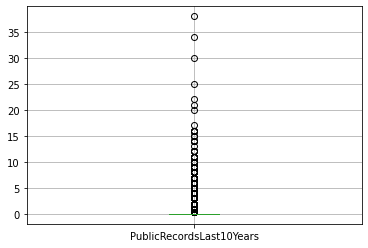

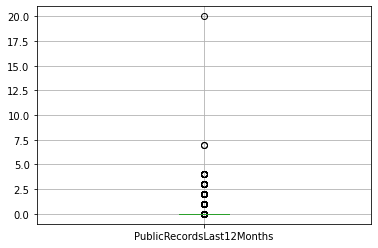

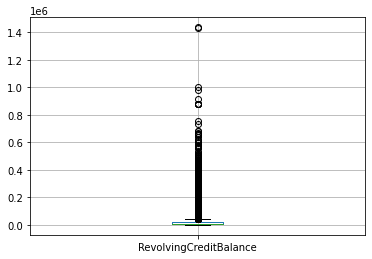

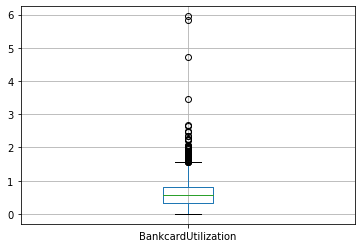

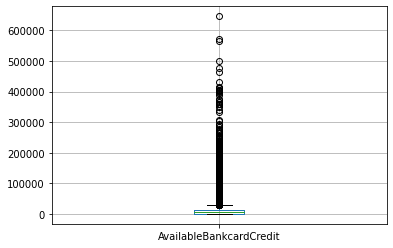

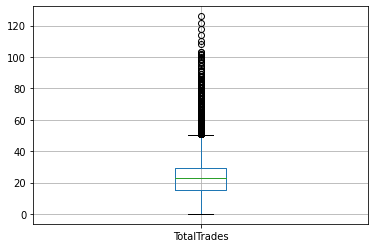

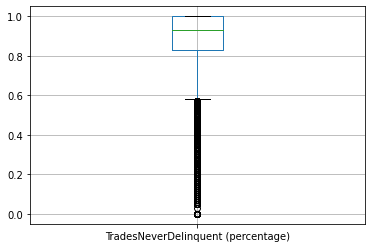

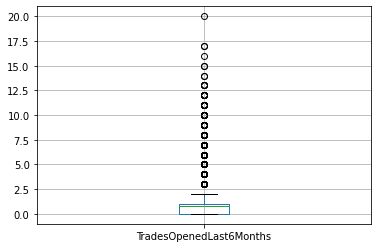

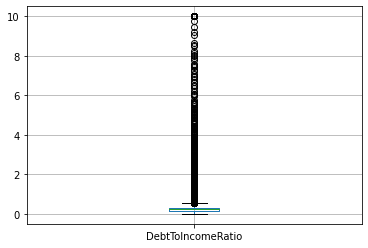

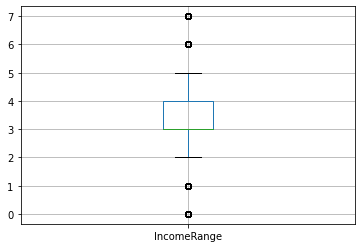

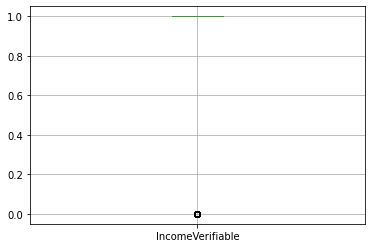

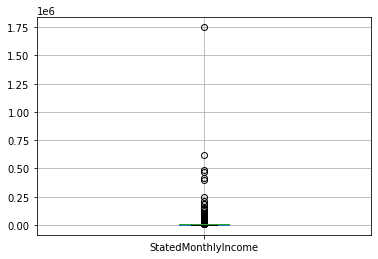

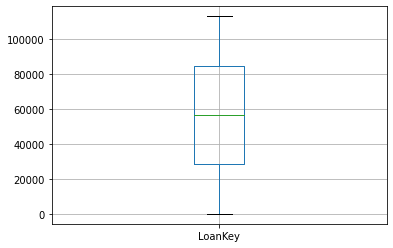

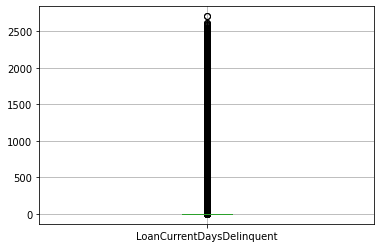

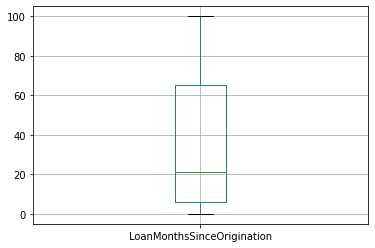

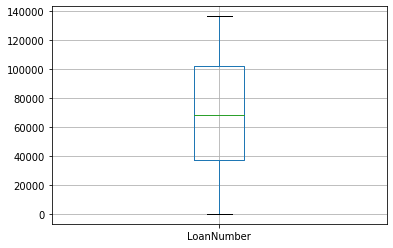

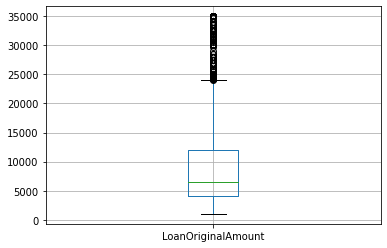

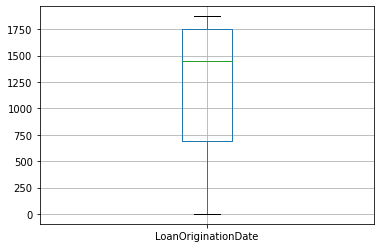

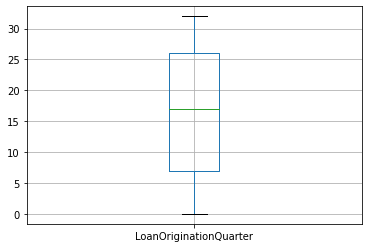

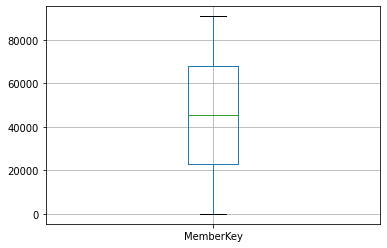

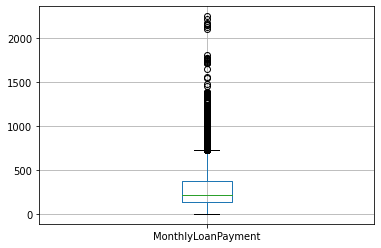

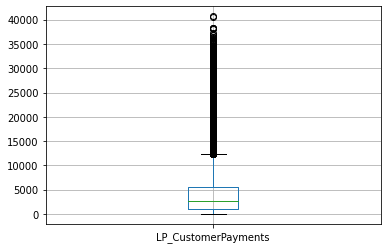

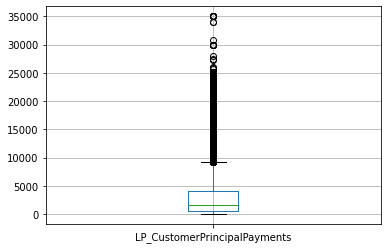

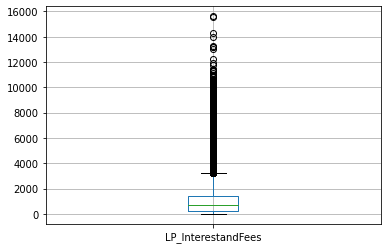

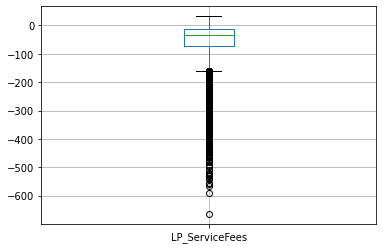

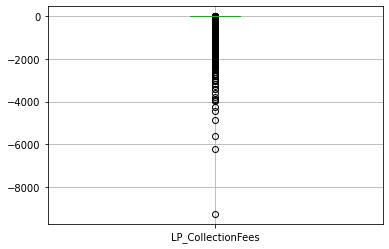

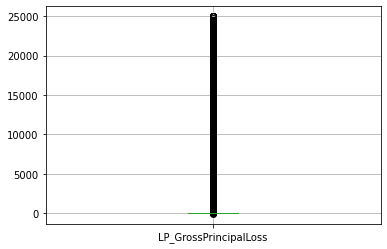

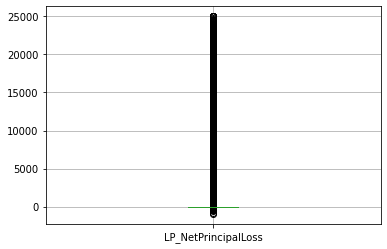

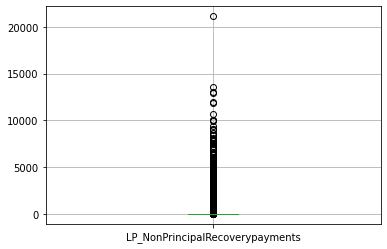

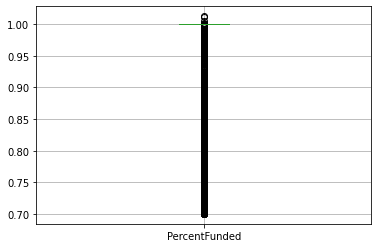

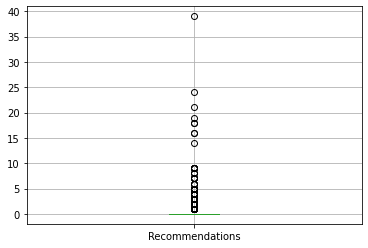

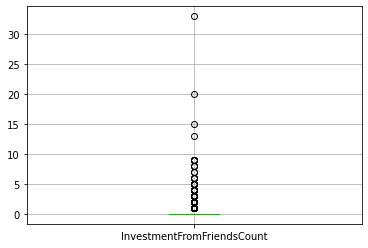

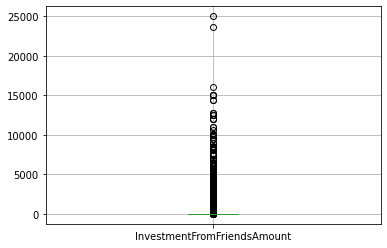

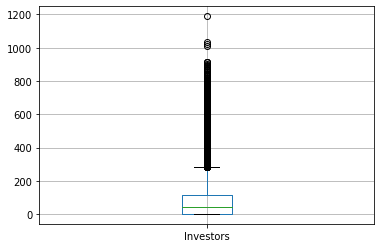

In [100]:
for column in df:
    plt.figure()
    df.boxplot([column])

In [101]:
# Compute the Z-scores for each column in the dataset
z_scores = np.abs((df - df.mean()) / df.std())
# Remove the rows that contain outliers
df = df[(z_scores < 3).all(axis=1)]

<ipython-input-102-6a769597b756>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


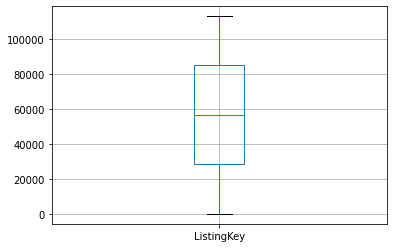

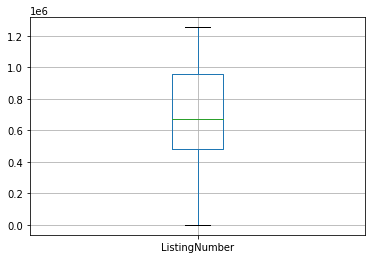

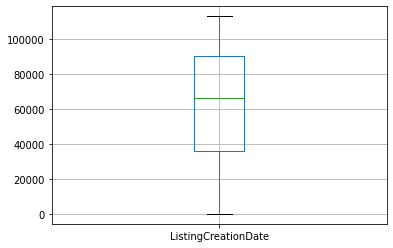

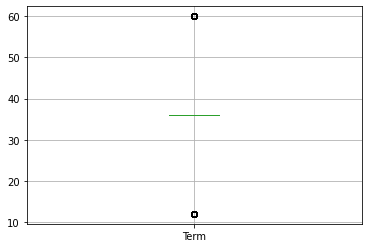

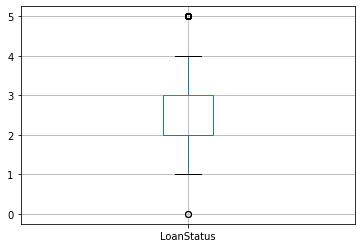

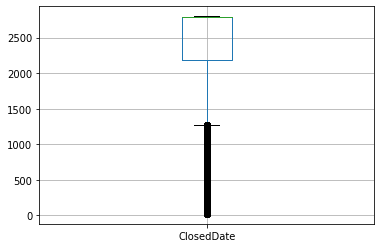

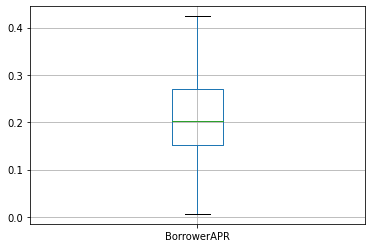

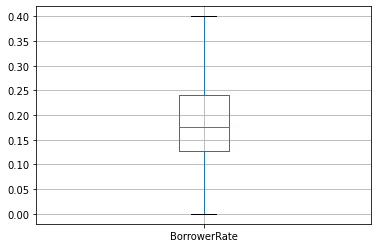

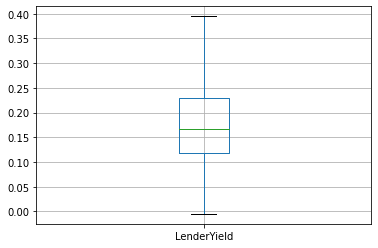

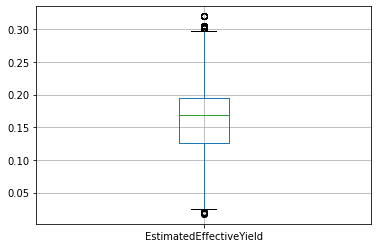

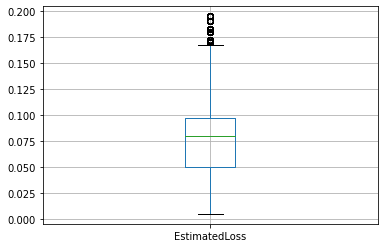

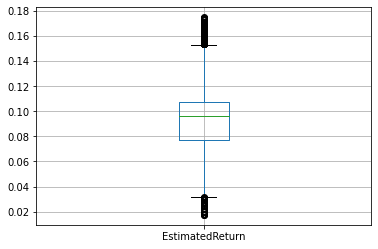

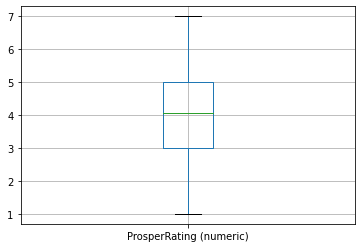

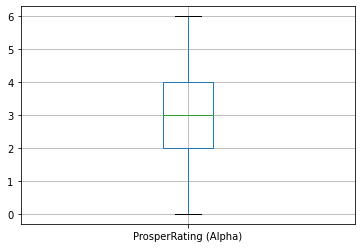

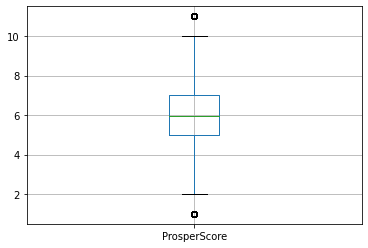

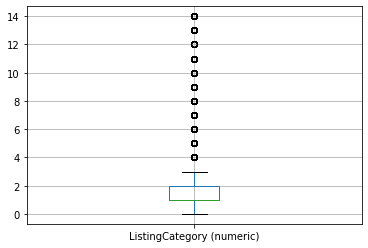

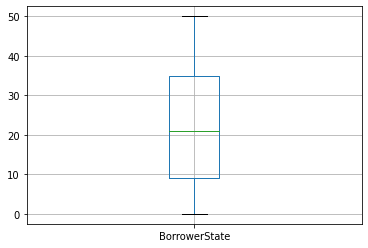

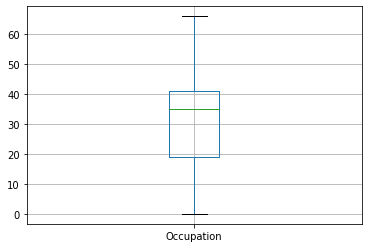

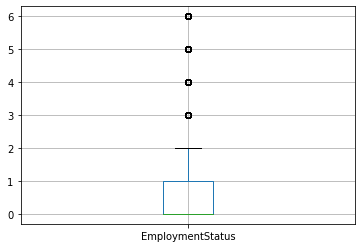

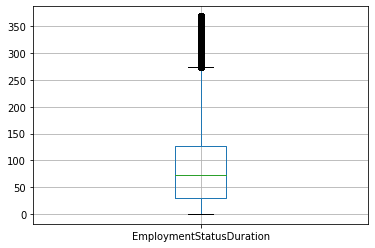

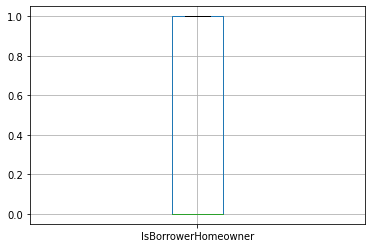

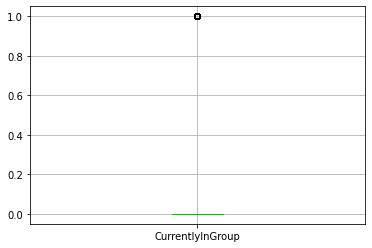

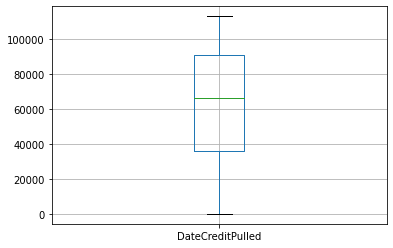

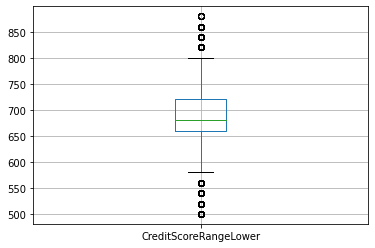

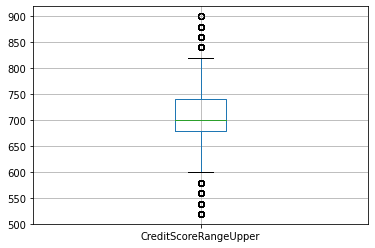

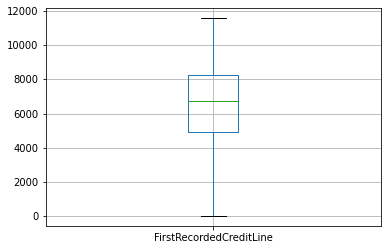

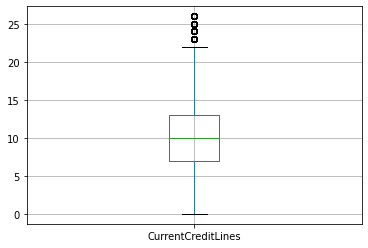

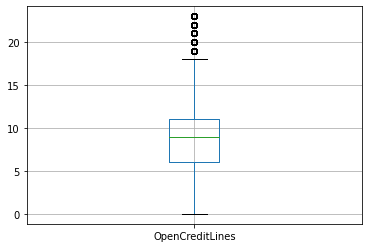

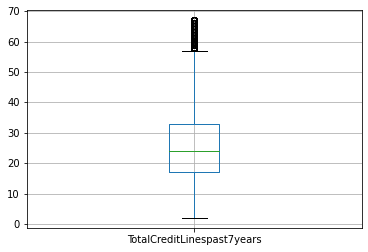

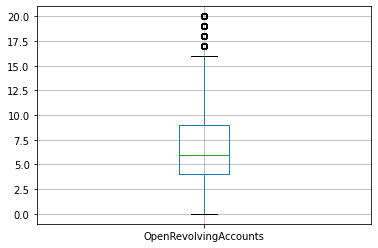

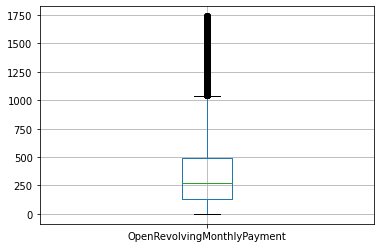

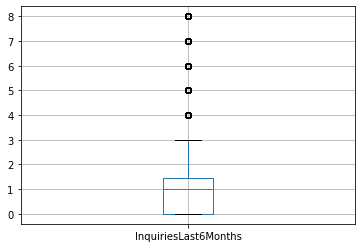

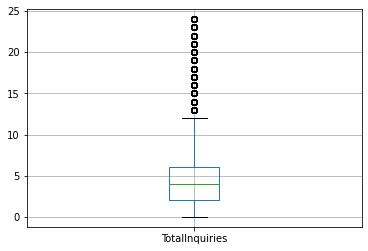

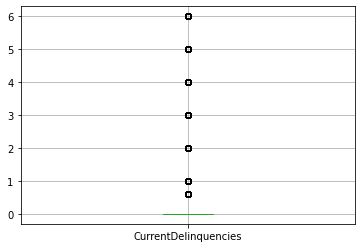

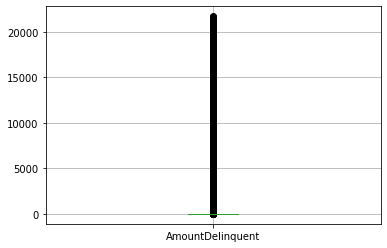

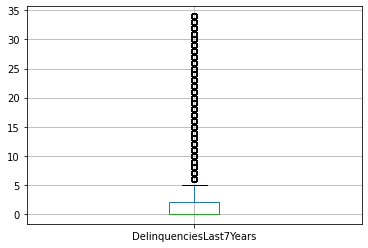

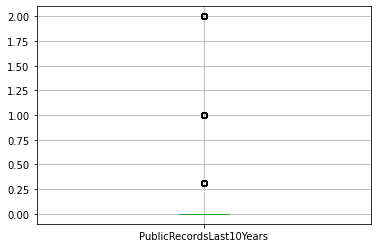

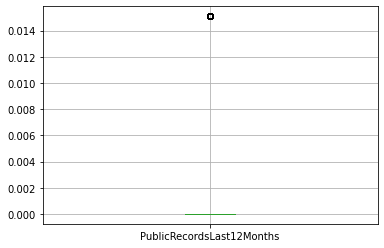

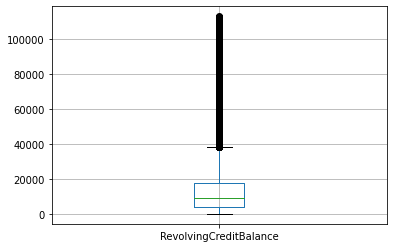

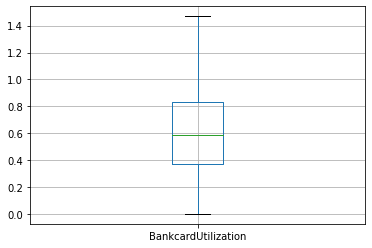

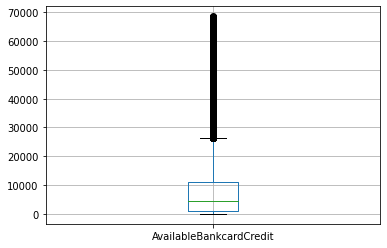

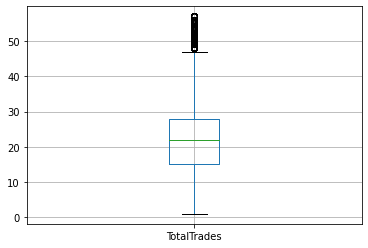

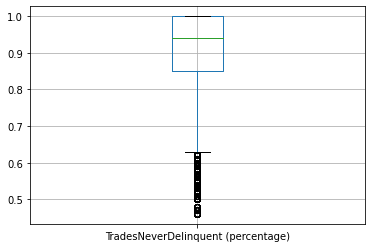

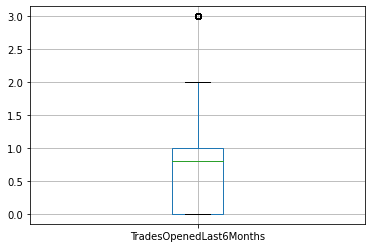

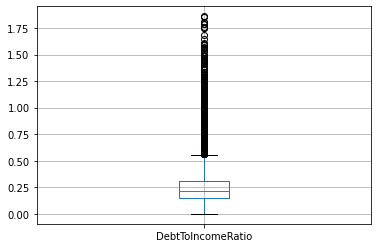

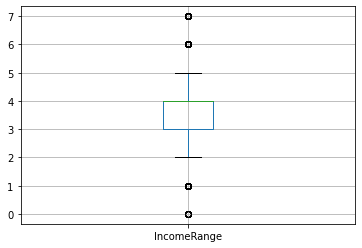

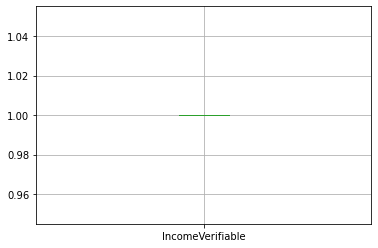

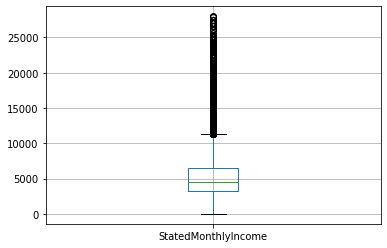

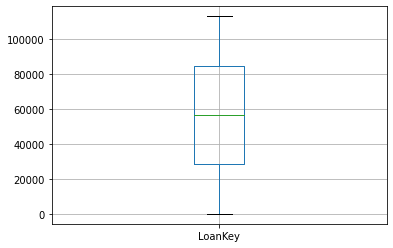

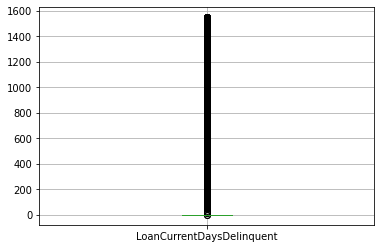

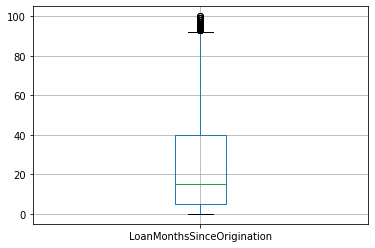

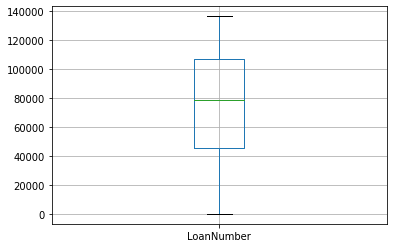

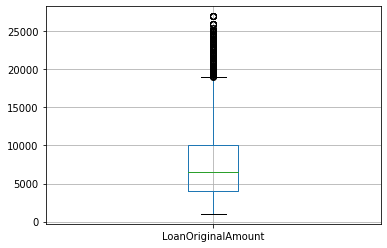

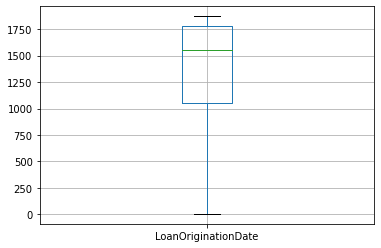

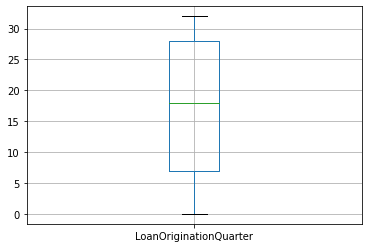

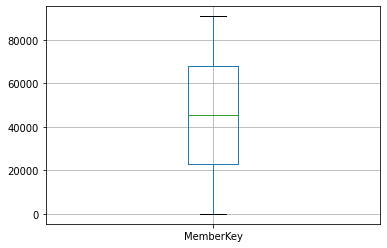

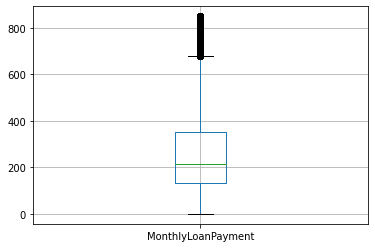

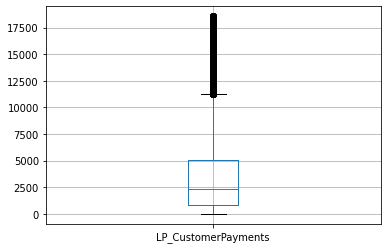

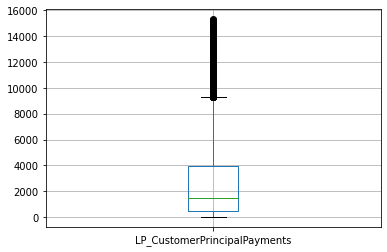

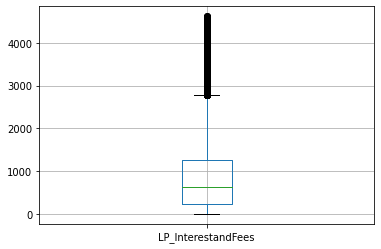

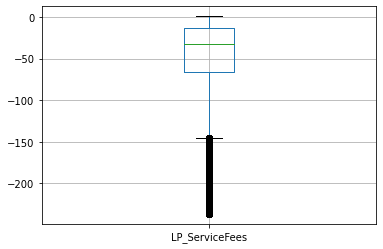

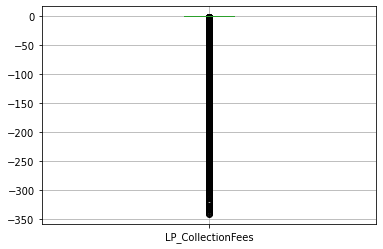

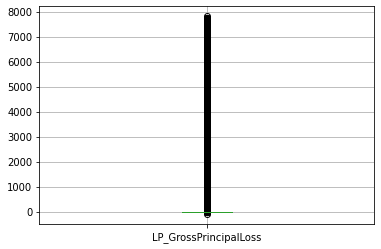

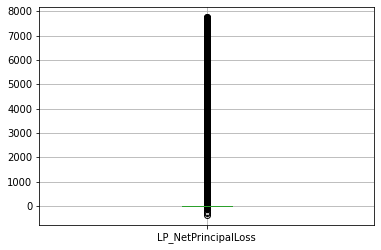

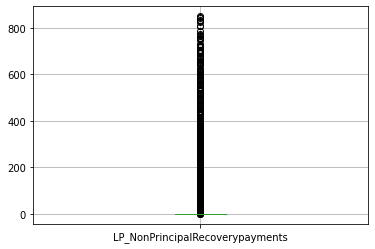

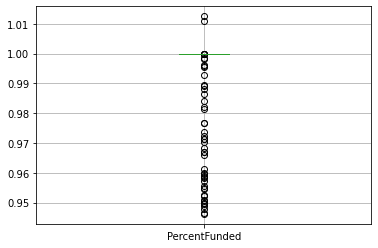

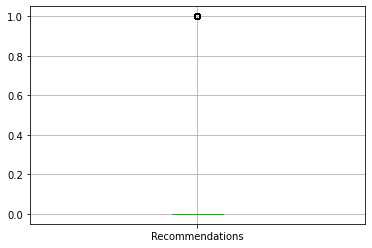

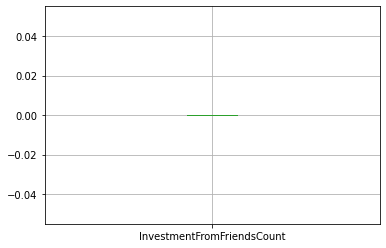

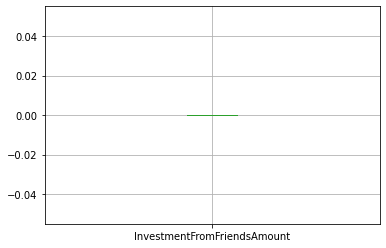

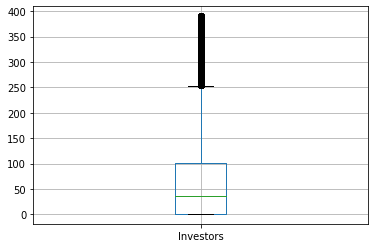

In [102]:
for column in df:
    plt.figure()
    df.boxplot([column])

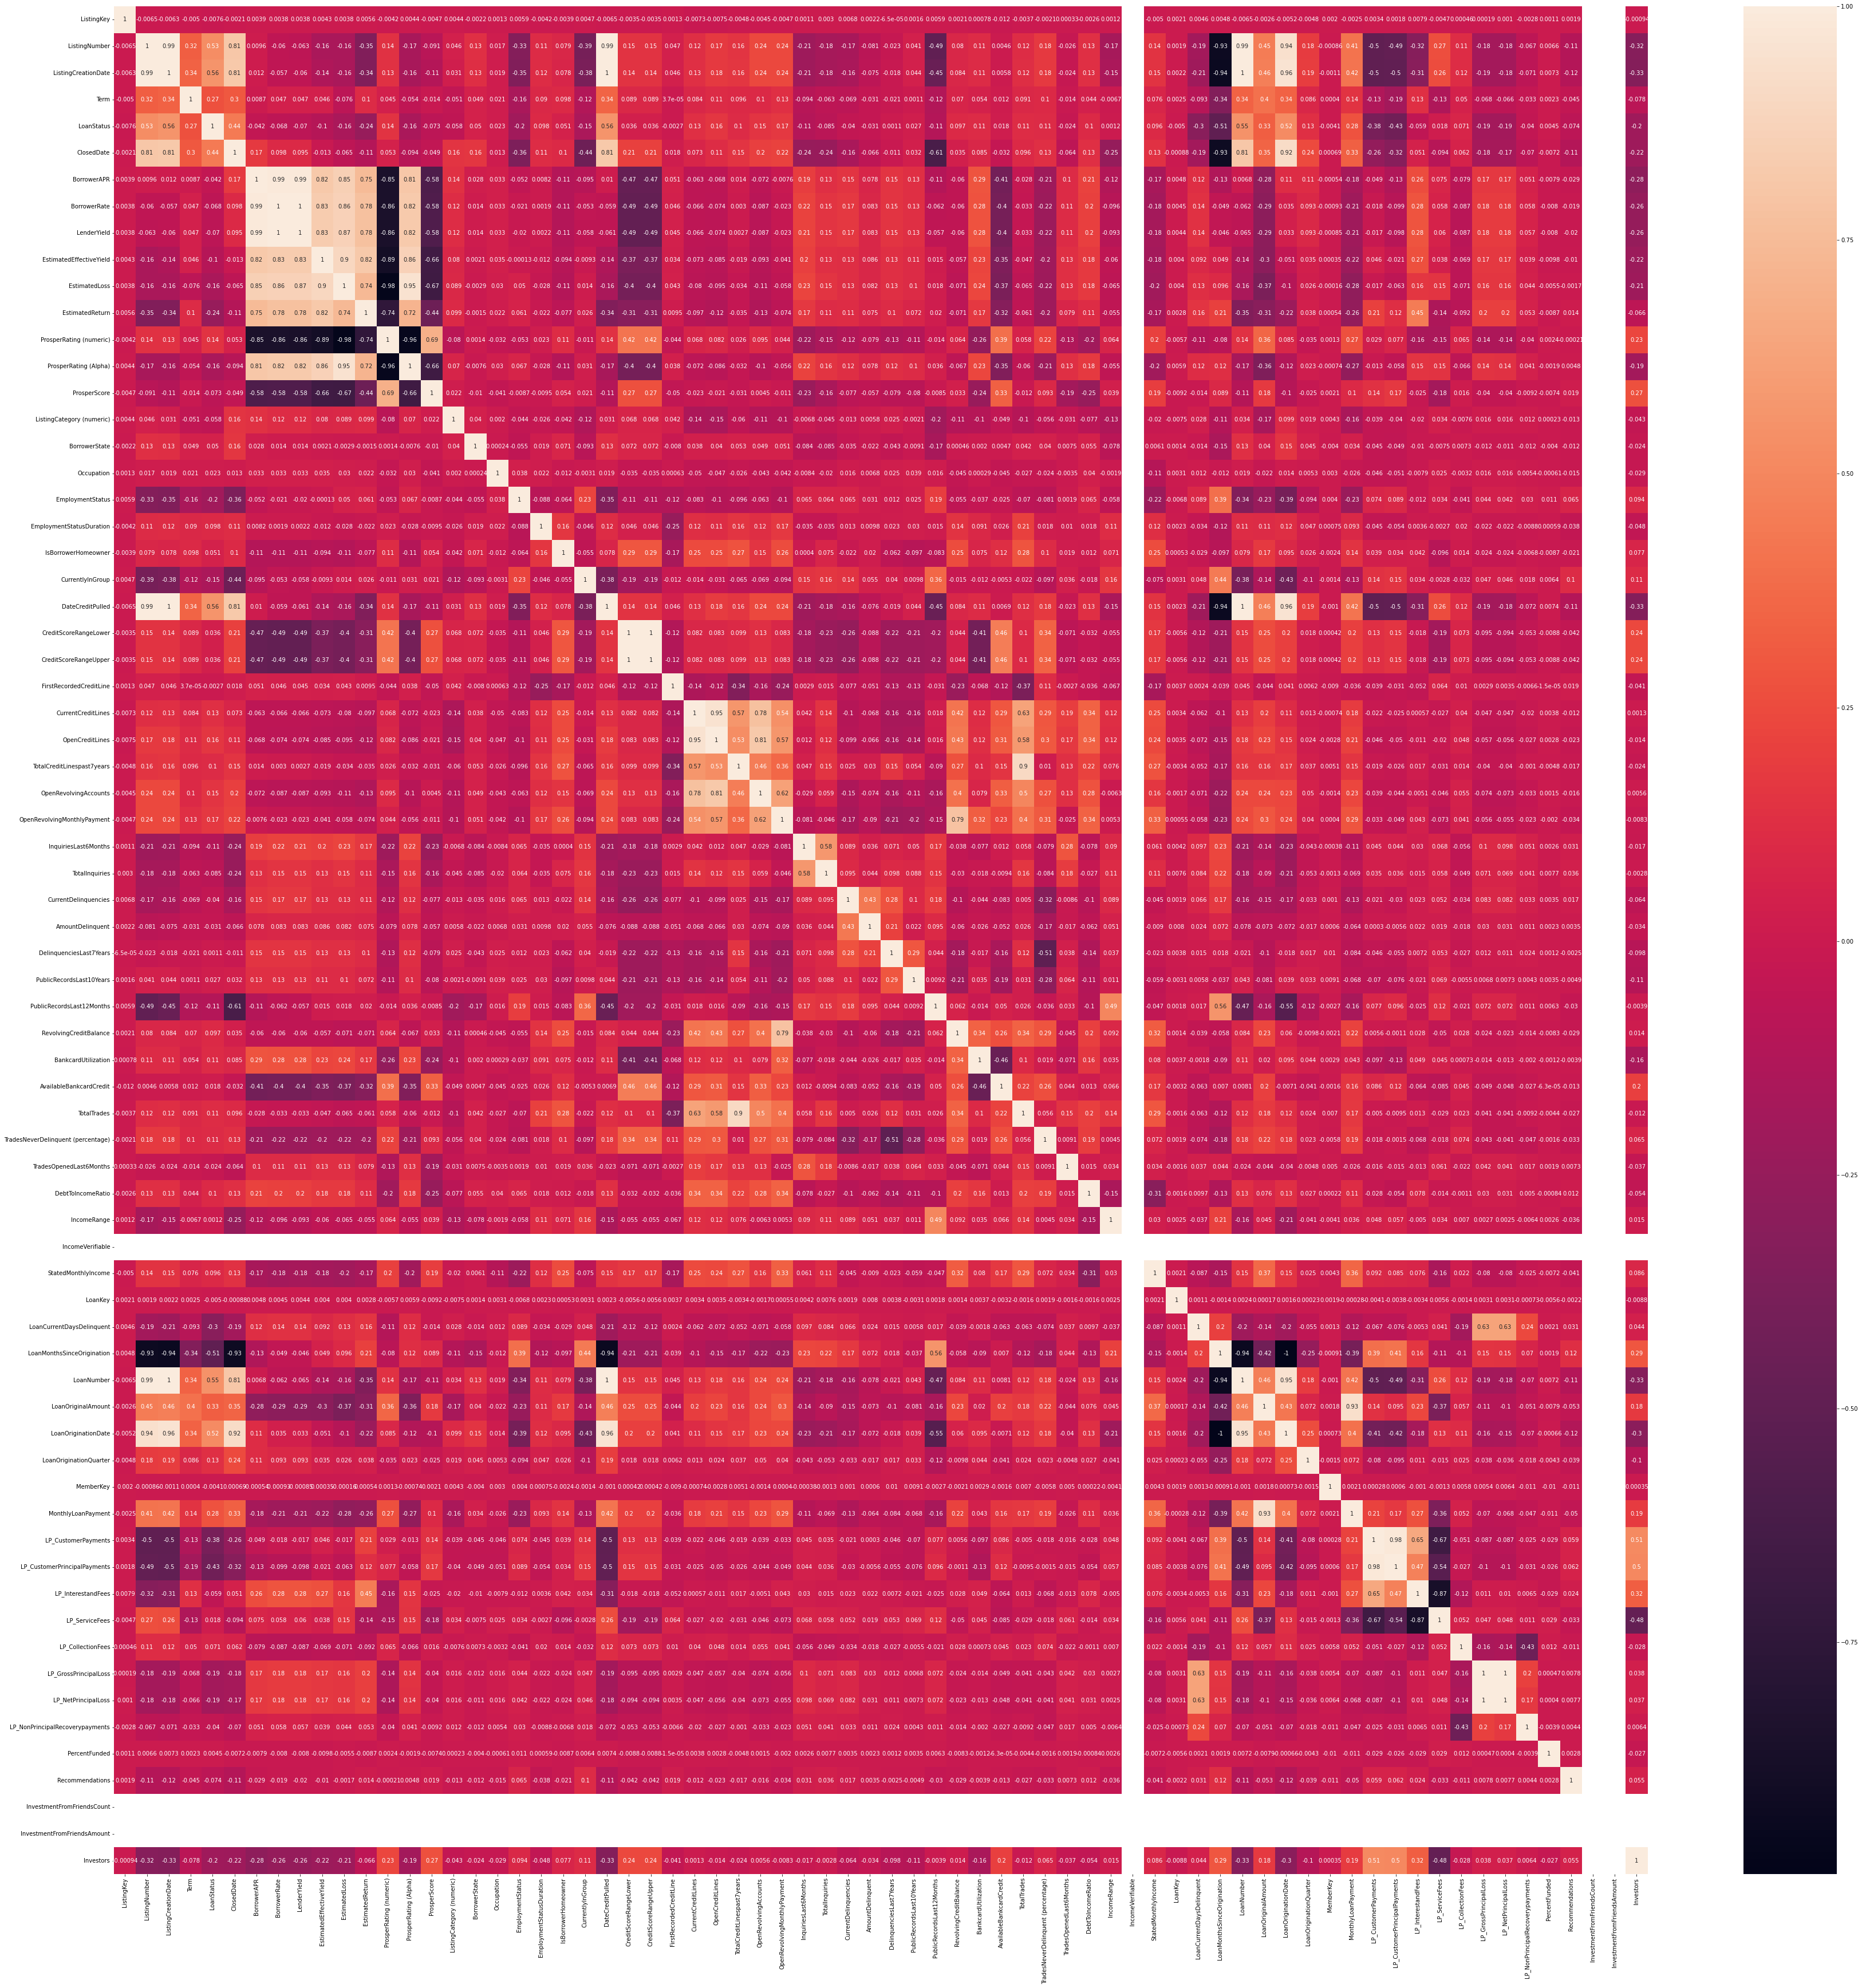

In [103]:
plt.figure(figsize=(60,60)) 
sns.heatmap(df.corr(),annot = True)
plt.show()